<h1 style="text-align:center;color:teal;font-family:calibri;font-size:250%">Capestone project on Sales Forecasting</h1>

### Problem Statement 

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.

### Business Goal

With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. To overcome this problem, we have to build a forecasting model to forecast the daily sales for the next six weeks.

### Importing Libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [2]:
# read the datasets
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

### Data Validation and Exploratory data analysis

In [3]:
# Check the train data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Check the store data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Checking the shape and info of dataset

In [5]:
train.shape

(1017209, 9)

In [6]:
store.shape

(1115, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### >> There are no missing values in the train dataset

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### >> There are some missing values in the store dataset

In [9]:
(store.isna().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#### We can Impute Columns Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0 as there is no Promo in the stores

In [10]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna(0, inplace=True)

#### We can impute CompetitionDistance with the mean

In [11]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

#### We can impute CompetitionOpenSinceMonth ,CompetitionOpenSinceYear with 0 as there is no competition details available

In [12]:
store['CompetitionOpenSinceYear'].fillna(0,inplace=True)
store['CompetitionOpenSinceMonth'].fillna(0,inplace=True)

In [13]:
(store.isna().sum()/store.shape[0])*100

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

### Univarient data analysis

In [14]:
store_cat=['StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [15]:
train_cat=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

In [16]:
# Creating function to plot categorical columns

def CountPlot(features,df):
    cols=4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    dataframe = df.copy()
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        fig.tight_layout(h_pad=5, w_pad=5)
        dataframe[feature] = dataframe[feature].fillna('Missing')
        ax = sns.countplot(x=feature, data=dataframe,order = dataframe[feature].value_counts().index)
        plt.xticks(rotation = 90)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(dataframe) * 100),
                    ha="center")

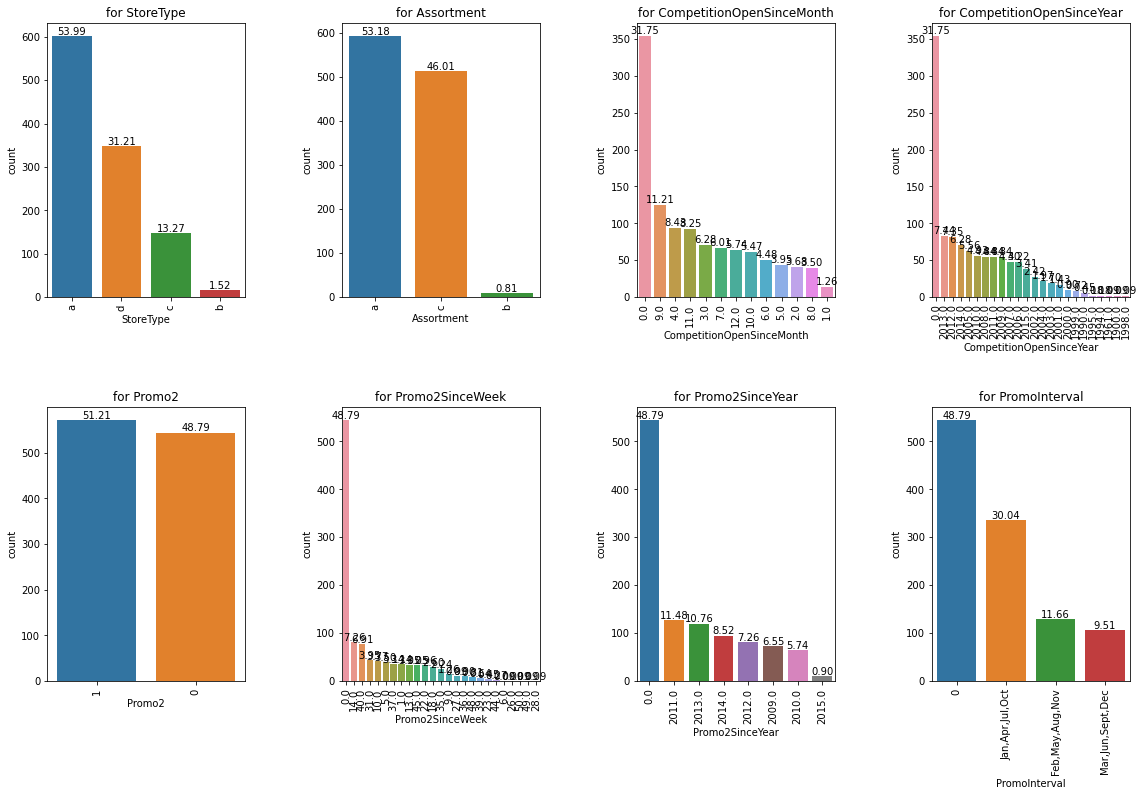

In [17]:
CountPlot(store_cat,store)

#### Some Inferences from above plots are:

1. StoreType `a` is the majority with `54%` followed by `d,c,b` with `31%,13%,2%` respectively
2. `53%` of the store have `basic` Assortments, `46%` have `extended` and `1%` with `extra`
3. Around `6%` of the stores have competition Since `12 months` followed by some stores around `9%` competition since `4 months` and around `11%` have competition Since `9 months`
4. Around `51%` of the stores are actively and consecutively participating in  `Promotional offers`
5. Around `30%` of the promotional events are during the months of `JAN, APR, JUL, OCT`

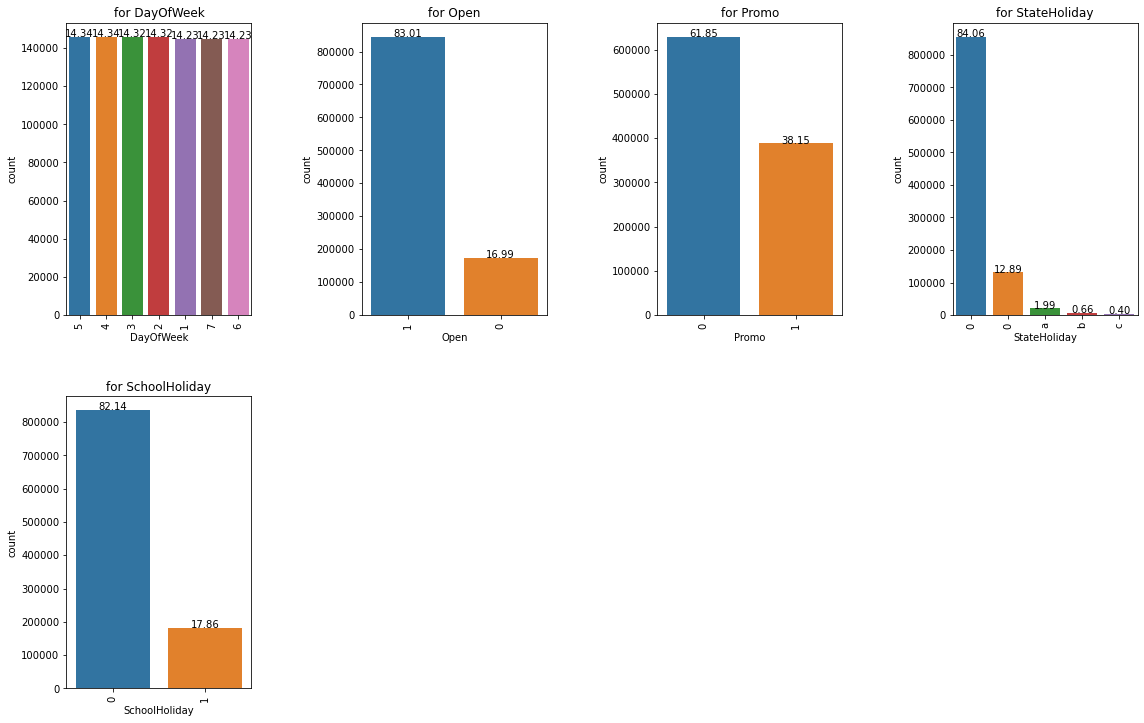

In [18]:
CountPlot(train_cat,train)

#### Some Inferences from above plots are:

1. All days of the week are equally distributed
2. `83%` of the stores were `open` and `38%` of stores have `promotions` going on
3. `18%` of the Stores are closed due to `School Holidays`

### Checking the dataset for outliers

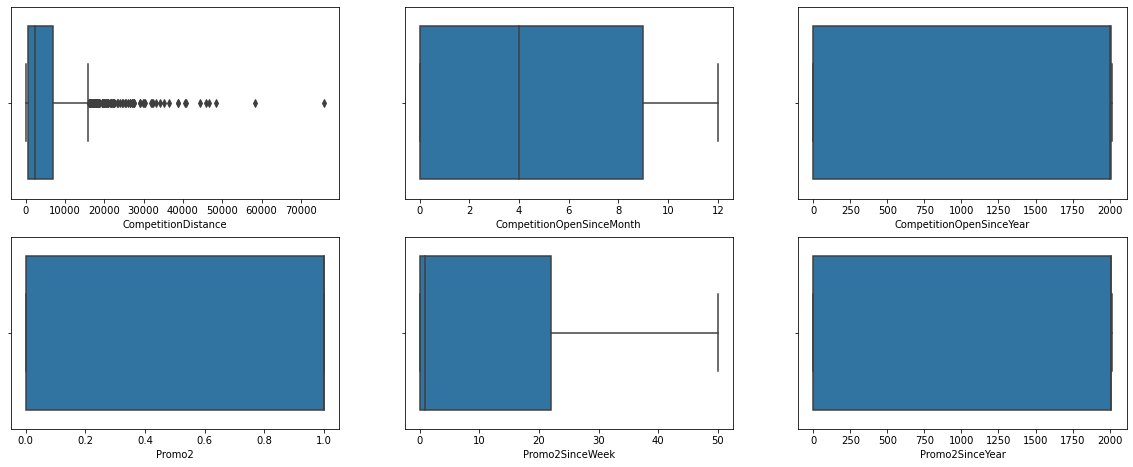

In [19]:
# box plots
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

#### Find outliers at the 99th percentile and removing them

In [20]:
# Capping  with 99th Percentile
store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)

### Multivarient Analysis/ Correlation Plot

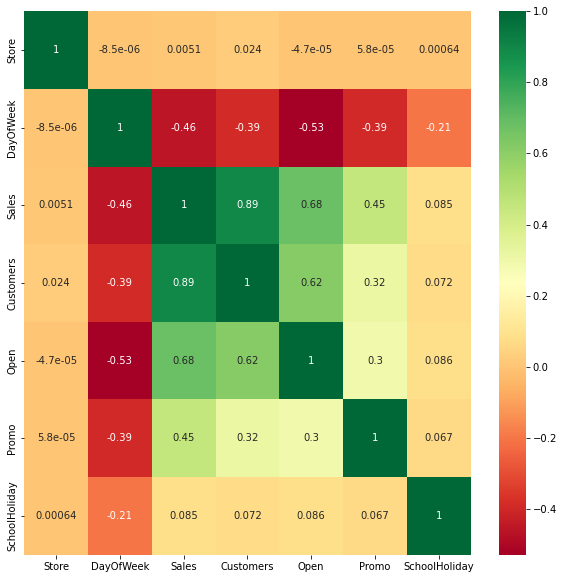

In [21]:
# Heatmap for train dataset
plt.figure(figsize=[10,10])
sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Some Inferences from above plots are:

1. `DayOfWeek` has a `-ve correlation` with `Promo, Open, Customers, Sales` columns
2. `Sales` and `Customers` have a strong `+ve correlation of 0.89`
3. `Open` is Positively correalted with `Customer and Sales` with correlation index of `0.62 and 0.68` respectively

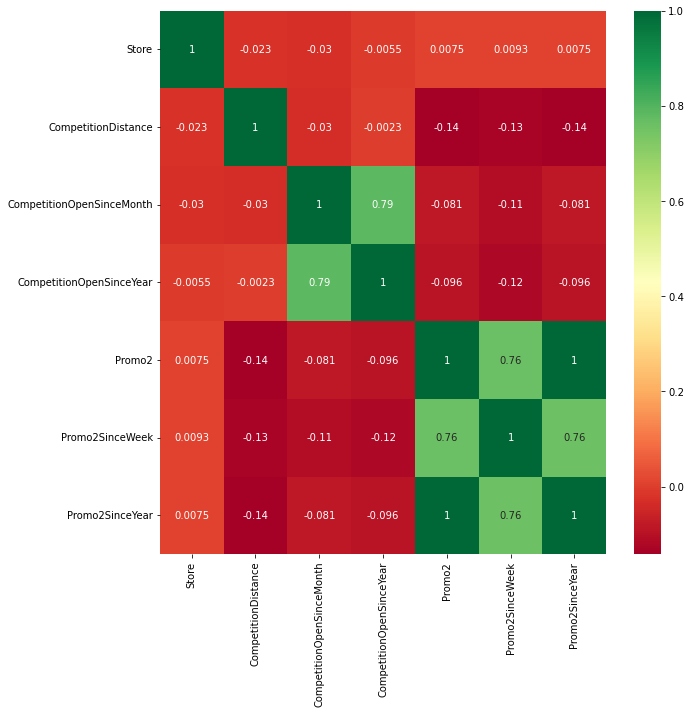

In [22]:
# Heatmap for store dataset
plt.figure(figsize=[10,10])
sns.heatmap(store.corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Some Inferences from above plots are:

1. `CompetitionDistance` has a weak negative correlation with other columns
2. `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` are positively correlated with correlation index of `0.79`

### Merging the train and Store datasets

In [23]:
df = train.merge(right=store, on='Store', how='inner')

In [24]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [25]:
df.shape

(1017209, 18)

### Bivarient analysis on Numerical Columns

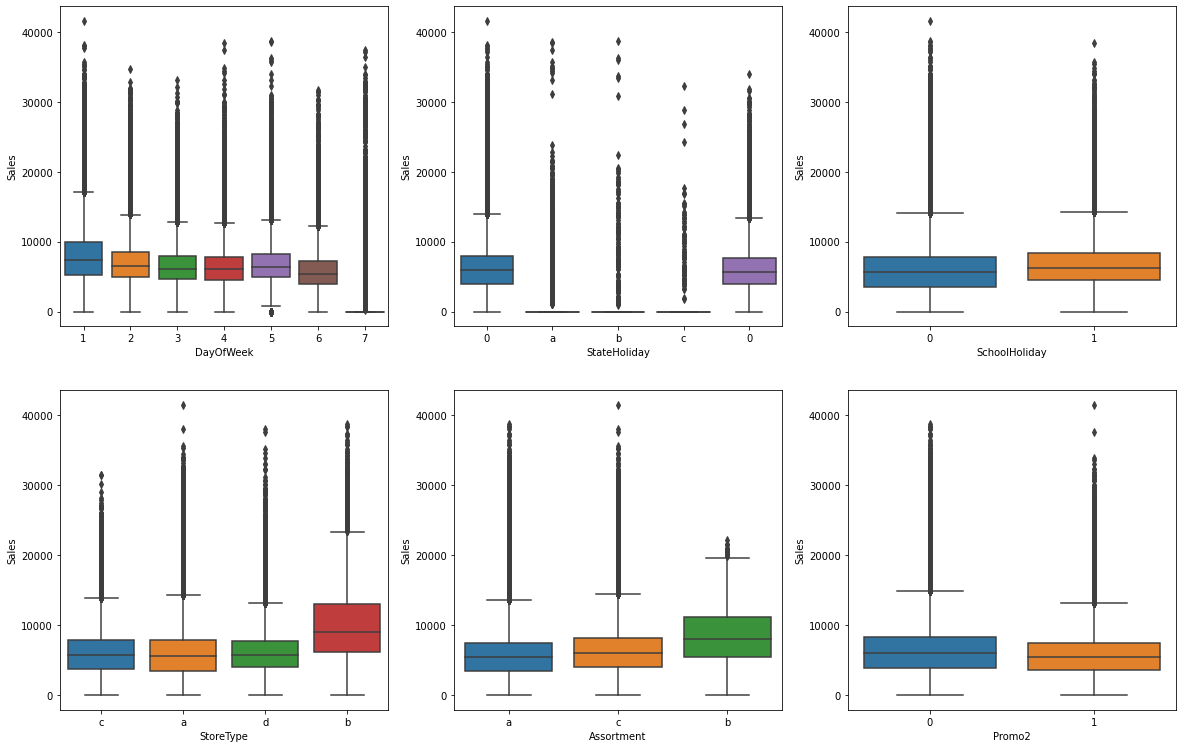

In [26]:
#Analysis of sales and other columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'StoreType', y = 'Sales', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Assortment', y = 'Sales', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2', y = 'Sales', data = df)
plt.show()

#### Some Inferences from above plots are:

1. Sales are `higher` on `Monday`, and `less` on `Sunday`
2. Sales are `higher` on `StoreType b`
3. Sales are `highest` on `Assortments` with `type b(extra)`
4. Sales are the `least` on the `stateholidays`

### Analysis on Numerical vs Categorical Columns

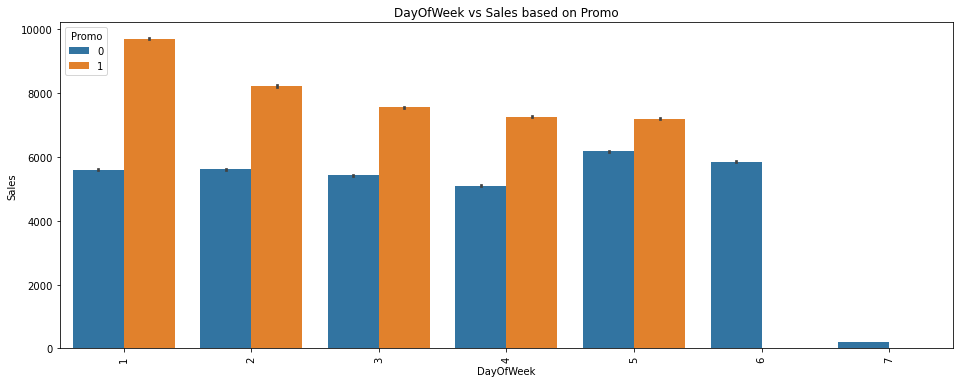

In [27]:
# Sales vs DayOfWeek
plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=df)
plt.title("DayOfWeek vs Sales based on Promo")
plt.xticks(rotation = 90)
plt.show()

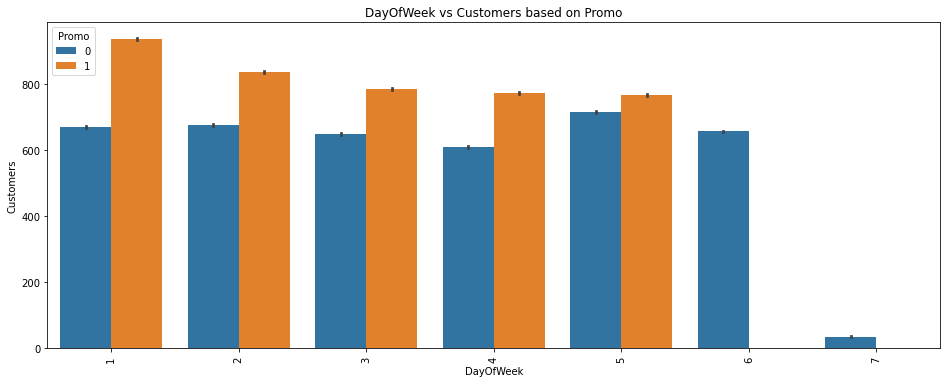

In [28]:
# DayOfWeek vs Customers
plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("DayOfWeek vs Customers based on Promo")
plt.xticks(rotation = 90)
plt.show()

#### Some Inferences from above plots are:

1. `Sales` are the highest around `10k` with Promotion offers on `Monday`
2. `Customers` visit the Stores more on `Mondays` when there are `promotional offers going on`

### Feature Engineering

In [29]:
# Converting DayOfWeek column to Object datatype
df['DayOfWeek']= df['DayOfWeek'].astype(dtype = 'object',errors='raise')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  object 
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [31]:
# Dummification on Categorical columns DayOfWeek,StoreType and Assortment

dummies = pd.get_dummies(df['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
df_val = pd.concat([df,dummies],axis=1)
dummies = pd.get_dummies(df['Assortment'],drop_first=True,prefix='Assortment')
df_val = pd.concat([df_val,dummies],axis=1)
dummies = pd.get_dummies(df['StoreType'],drop_first=True,prefix='StoreType')
df_val = pd.concat([df_val,dummies],axis=1)

In [32]:
df_val.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,0,0,1,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,0,0,1,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,0,0,1,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,0,0,1,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_val.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Assortment_b', 'Assortment_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d'],
      dtype='object')

In [34]:
df_val.shape

(1017209, 29)

In [35]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  object 
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [36]:
# Dropping DayOfWeek, StoreType and Assortment
df_val.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)

In [37]:
# Dropping Columns 'Promo2','Promo2SinceWeek','Promo2SinceYear' as it does not have impact on sales column
df_val.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'],inplace=True,axis=1)

In [38]:
# Converting Date columns from Object to Date
df_val['Date']=pd.to_datetime(df_val['Date'],errors='coerce')

In [39]:
df_val.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,0,0,1,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,0,0,1,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,0,0,1,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,0,0,1,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   Date                       1017209 non-null  datetime64[ns]
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSinceYear   1017209 non-null  float64       
 11  PromoInterval              1017209 no

### Time series Analysis

In [41]:
# Set the Date column as index
df_final = df_val.set_index('Date')
df_final.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,9.0,2008.0,...,0,0,1,0,0,0,0,0,1,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,0,1,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,9.0,2008.0,...,1,0,0,0,0,0,0,0,1,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,9.0,2008.0,...,0,0,0,0,0,0,0,0,1,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,9.0,2008.0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Grouping the data at a date level for analysis
df_agg = df_final.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
df_agg.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6233.030493,748.049327,0,1115,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,5693.112108,682.547085,0,1040,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,5954.218834,701.468161,0,1040,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,5337.751570,616.566816,0,112,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Creating a function for time series plots
def timeseries_plot(series,c):
    fig = plt.figure(figsize=(20, 3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title('For {}'.format(c))
    plt.show()

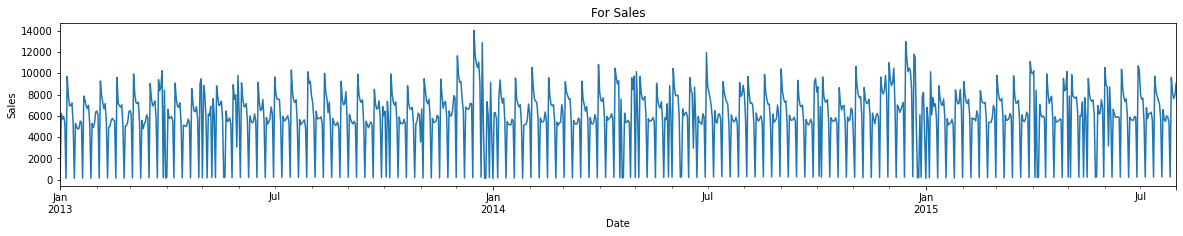

In [44]:
# Plotting time series chart for Sales
timeseries_plot(df_agg['Sales'],'Sales')

### Applying additive decomposition

In [45]:
# Creating function for seasonal decomposition
import matplotlib as mlp
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decomposition(series,c,model):
    mlp.rcParams['figure.figsize'] = 18, 14
    decomposition = seasonal_decompose(series, model=model) # additive seasonal index
    fig = decomposition.plot()
    plt.show()
    print('Mean Residual for {}={}'.format(c,decomposition.resid.mean()))

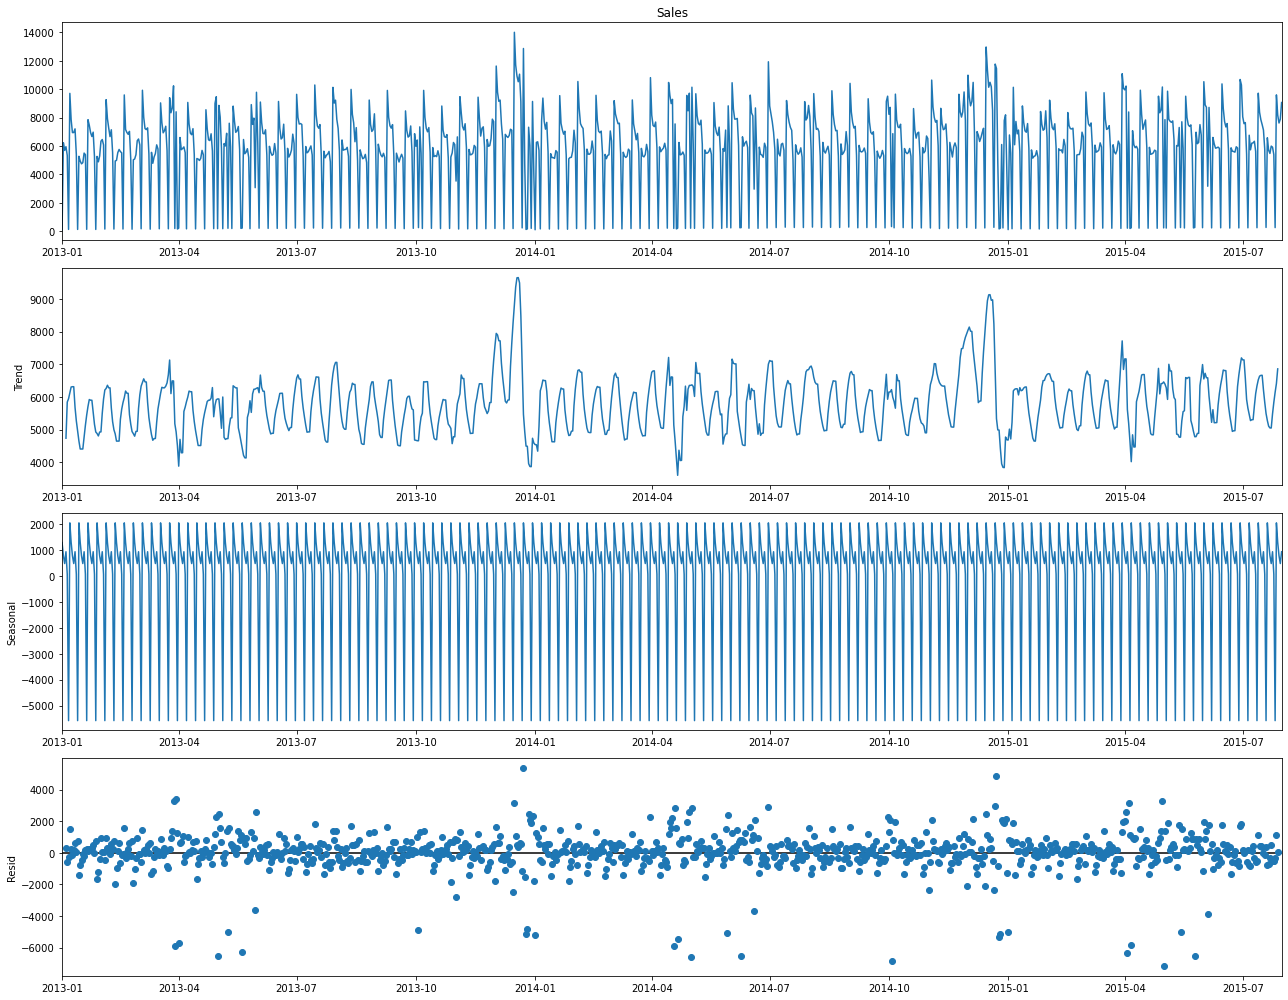

Mean Residual for Sales=0.6202792140320815


In [46]:
plot_seasonal_decomposition(df_agg['Sales'],'Sales','additive')

### AdFuller for Stationary test

In [47]:
# Creating a function for using ADF statistic
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ',c)
        print('='*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
            print('\n')
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.") 
            print('\n')

In [48]:
stationary_test(df_agg[['Sales','Customers']])

For  Sales
ADF Statistic= -5.650822837207889
P value= 9.870006549262306e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


For  Customers
ADF Statistic= -5.933710149589019
P value= 2.3477735379188178e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




#### The p-values for both the variables is less than 0.05. We can reject the null hypothesis thus the series is stationary

### Plotting the ACF and PACF Plots to calculate the values of p and q

<Figure size 864x288 with 0 Axes>

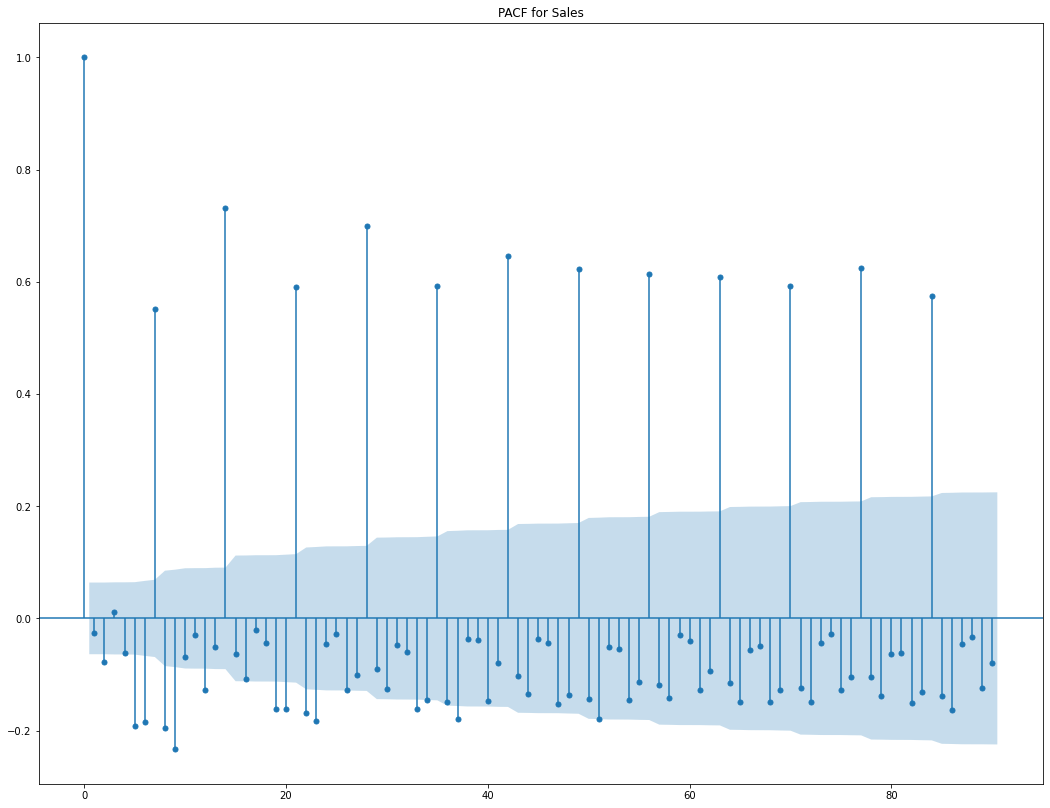

In [49]:
# ACF plot for Sales
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(df_agg['Sales'], lags = 90)
plt.title('PACF for {}'.format('Sales'))
plt.show()

<Figure size 864x288 with 0 Axes>

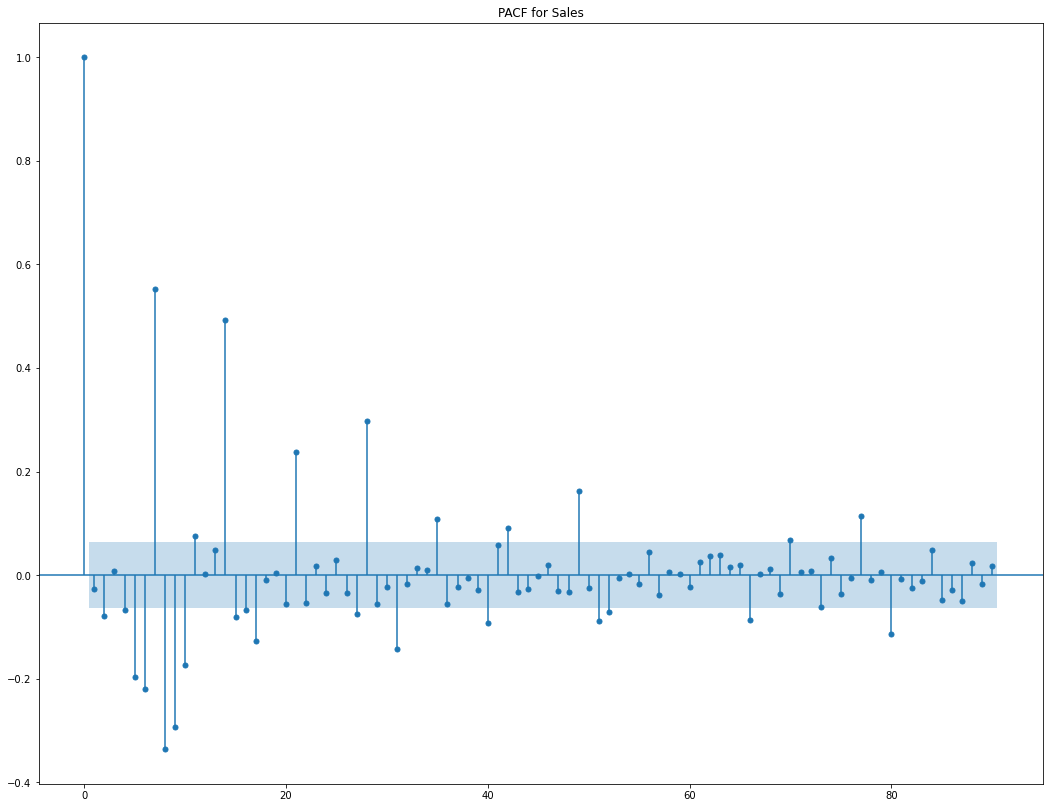

In [50]:
# PACF plot for Sales
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(df_agg['Sales'], lags = 90)
plt.title('PACF for {}'.format('Sales')) 
plt.show()

#### From ACF plot Value of q = 0 and From PACF plot Value of p = 7

### Data PreProcessing

#### Train Test split

In [51]:
df_agg.shape

(942, 10)

In [52]:
# We need to predict sales for the next 42 days. So, we keep 42 days for test and remaining for training.

train_len=900
df_train=df_agg.iloc[:train_len,:]
df_test=df_agg.iloc[train_len:,:]

#### Scaling the data using MinMaxScalar and transform the data

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[['Sales','Customers','Promo','SchoolHoliday']]=scaler.fit_transform(df_train[['Sales','Customers','Promo','SchoolHoliday']])
df_train.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.441350,0.543373,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,0.402577,0.494654,0.0,0.932735,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,0.421328,0.508727,0.0,0.932735,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,0.377057,0.445579,0.0,0.100448,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
df_test[['Sales','Customers','Promo','SchoolHoliday']]=scaler.transform(df_test[['Sales','Customers','Promo','SchoolHoliday']])
df_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-06-21,0.009824,0.015096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-06-22,0.415762,0.489576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06-23,0.399006,0.475851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-06-24,0.396755,0.474848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Model Building

### Model - 1 : VAR (Vector Auto Regressive)

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen #Johansen Cointegration test
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

In [56]:
exog = df_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = df_train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.15      -12.05   5.280e-06      -12.11
1       -12.27      -12.15   4.698e-06      -12.22
2       -12.27      -12.12   4.712e-06      -12.21
3       -12.30      -12.14   4.533e-06      -12.24
4       -12.31      -12.12   4.515e-06      -12.24
5       -12.31      -12.10   4.510e-06      -12.23
6       -12.32      -12.09   4.469e-06      -12.23
7       -12.32      -12.07   4.448e-06      -12.23
8       -12.48      -12.20   3.821e-06      -12.37
9       -12.51     -12.21*   3.707e-06      -12.39
10      -12.52      -12.21   3.648e-06      -12.40
11      -12.54      -12.20   3.581e-06      -12.41
12      -12.53      -12.18   3.604e-06      -12.40
13      -12.54      -12.16   3.574e-06      -12.40
14      -12.59      -12.19   3.421e-06     -12.43*
15     -12.59*      -12.17  3.395e-06*      -12.43
-------------------------------

C:\Users\hanumanth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [57]:
# Fit the model with lag 11 since AIC and BIC is the lowest at lag 11.
var_model_final = var_model.fit(11)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     11:09:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2106
Nobs:                     889.000    HQIC:                  -12.4169
Log likelihood:           3115.22    FPE:                3.56415e-06
AIC:                     -12.5446    Det(Omega_mle):     3.32801e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.337940         0.057254            5.902           0.000
Promo                 0.169451         0.016244           10.432           0.000
SchoolHoliday        -0.033177         0.012687           -2

### Check the Cointegration using Johansen test

In [58]:
# Creating a function
def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [59]:
df_agg['Sales']=df_agg['Sales'].apply(lambda x:round(x))
df_agg['Customers']=df_agg['Customers'].apply(lambda x:round(x))

In [60]:
cointegration_test(df_agg[['Sales','Customers']],10)
rank_result=select_coint_rank(df_agg[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  127.93    > 12.3212   =>   True
Customers ::  6.57      > 4.1296    =>   True


In [61]:
print(rank_result.rank)

2


#### We have the rank of matrix from Johassen test as 2 which means that the time series are stationary but are not cointegrated

In [62]:
# Getting lag order
lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = df_train[['Sales','Customers']].values[-lag_order:]
forecast_input

11


array([[0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

### Timeseries forecasting using VAR model

In [63]:
exog_test = df_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=df_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.441004,0.500055
2015-06-21,0.015879,0.013267
2015-06-22,0.427535,0.508562
2015-06-23,0.414973,0.506646
2015-06-24,0.377980,0.462299
2015-06-25,0.343401,0.426233
2015-06-26,0.434158,0.515352
2015-06-27,0.419477,0.473930
2015-06-28,0.021367,0.018221


In [64]:
#Adding forecasted values

df_test['VarForecastedSales']=var_forecast.Sales
df_test['VarForecastedCustomers']=var_forecast.Customers

In [65]:
# Function for forecasting the timeseries
def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

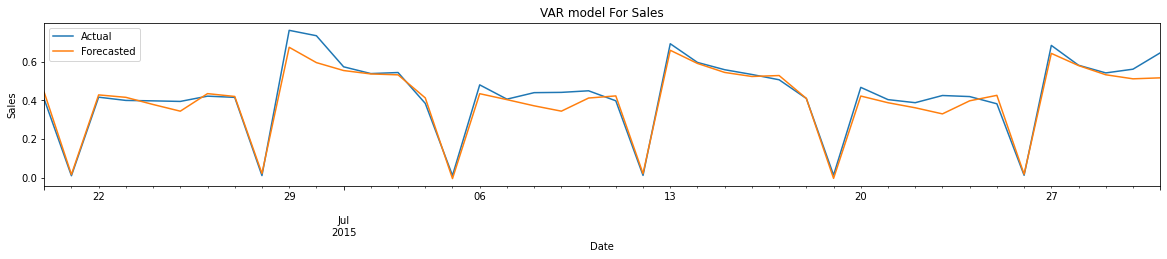

In [66]:
forecasted_timeseries_visualization(df_test['Sales'],df_test['VarForecastedSales'],'Sales','VAR')

### Model Evaluation

In [67]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [68]:
# Model Summary
df_final=summary(df_test['Sales'], df_test['VarForecastedSales'],
       df_test['Customers'], df_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, df_final])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.1


#### We see that VAR model has a MAPE of 19.37 for sales and 9.1 for Customers

### Model - 2 : VARMAX (Vector Auto Regressive with Exogenous variable)

In [69]:
# Building the model with the values of p=7 and q=0
exog = df_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = df_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

C:\Users\hanumanth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hanumanth\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3029.587
                              + intercept   AIC                          -5961.174
Date:                    Tue, 07 Mar 2023   BIC                          -5725.857
Time:                            11:13:08   HQIC                         -5871.281
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.29, 40.79   Jarque-Bera (JB):     5487.63, 1855.19
Prob(Q):                        0.26, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.62, 1.51   Skew:                     -1.73, -1.52
P

### Timeseries forecasting using VARMAX model

In [70]:
exog_test = df_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= df_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=df_test.index.min(),end=df_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=df_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.441940,0.501279
2015-06-21,0.011781,0.010645
2015-06-22,0.461498,0.527929
2015-06-23,0.403780,0.496235
2015-06-24,0.362724,0.458699


In [71]:
#Adding forecasted values

df_test['VarmaxForecastedSales']=varmax_forecast.Sales
df_test['VarmaxForecastedCustomers']=varmax_forecast.Customers

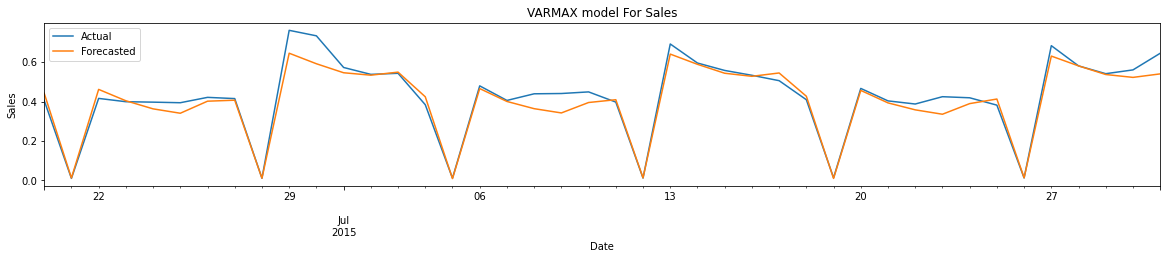

In [72]:
forecasted_timeseries_visualization(df_test['Sales'],df_test['VarmaxForecastedSales'],'Sales','VARMAX')

In [73]:
# Model Summary
df_final=summary(df_test['Sales'], df_test['VarmaxForecastedSales'],
       df_test['Customers'], df_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = pd.concat([summary_df, df_final])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.10
0,All,VARMAX,0.05,8.18,0.03,6.71


### >> Conclusion:

- We can see that `VAR Model` has `MAPE` of `19.37` and `VARMAX` has `8.18` for `Sales`

- Hence `VARMAX model` can be preferred in this case of forcasting `Sales` data for the next `6 weeks`